# Language feature
## Coding style
* Universal coding style is descrived in PEP-8 documentation (https://www.python.org/dev/peps/pep-0008/)
    * imports go on the top in sepatate lines
    * indent codes using 4 spaces instead of tabs
    * each line must be limited to 79 characters for codes and 72 characters from comments and docstrings including whitespaces
    * separate functions and classes by 2 blank lines, within classes seprate methods using 1 blank line 
    * No whitespaces around function calls, indices and kw arguments
    * Some whitespace guidelines
        - `spam(ham[1],{'eggs':2})`
        - `fn(arg)`
        - `dct['key'] = lst[idx]`
        - `x = 1`
        - `hypot = x*x + y*y`
        - `i = i + 1`

## Truth value testing
any object in python is boolian evaluable, any object is evaluated to true __unless its class implements a `bool()` method returns falls or the `len()` method returns 0__
* `False` and `None` are false by default
* All numeric type the evaluates to 0 id False (e.g. `0, 0.0, 0j` and `Decimal(0), Fraction(0,x)`)
* Empty sets and sequences are False (`'', (), [], {}` and `set(), range(0)`)
* Any custom object is true by default unless it overrides the `__bool__()` method and returns `False` or `__len__()` and returns `0`

In [8]:
class sample:
    def __init__(self,x):
        self.x = x
    def __bool__(self):
        return False

    
s = sample(5)
bool(s)  #test the boolean value

False

### Short Circuit Operator 

`and` & `or` operators are short circuit operators, i.e. if the first value  evaluates to `False` and `True` respectively, the second value is not evaluated and the result is evaluated to `False` and `True` respectively.

## Strings and Bytes
* String : a sequence of unicode characters 
* Bytes : a sequence of 8bit character 

In [18]:
s = 'this is a text'
b = s.encode('utf-8') # string to 8bit int array
s = b.decode('utf-8') # 8bit int array to string

In [19]:
print(s,type(s))
print(b,type(b))

this is a text <class 'str'>
b'this is a text' <class 'bytes'>


In [20]:
print(s[0],type(s[0]))
print(b[0],type(b[0]))

t <class 'str'>
116 <class 'int'>


In [24]:
print(s + b) #type missmatch

TypeError: can only concatenate str (not "bytes") to str

## Template String 

In [26]:
x,y,z=10,20,30

In [27]:
# basic formatting before python3.6
print('x={} y={} z={}'.format(x,y,z))

x=10 y=20 z=30


In [35]:
# basic formatting from python3.6
print(f'x={x} y={y} z={z}')

x=10 y=20 z=30


A template method allowes external sources to modify place holders without giving access to the actual string, but only the place holders. Better security in practice. 

In [33]:
#template string 
from string import Template
templ = Template('youre watching ${title} by ${author}')
print(templ.substitute(title='someting', author='someone'))

youre watching someting by someone


# Built-in functions

In [36]:
list = [1,2,3,0,5,6]

## `any()` and `all()`

In [37]:
print( any(list) ) # if at least one member is True

True


In [39]:
print( all(list) ) #  if all memebers are True

False


## `min()`,`max()` and `sum()`

In [40]:
print(f'min : {min(list)}')
print(f'max : {max(list)}')
print(f'sum : {sum(list)}')

min : 0
max : 6
sum : 17


## Iterator : `iter(X)`
turns a collection object into a iterator object, get items one by one using the `next` function

In [87]:
days = ['mon','tue','wed','thu','fri','sat','sun']

In [90]:
it = iter(days)
i = 1
while True:
    try:
        print(i,next(it))
        i+=1
    except StopIteration:
        break

1 mon
2 tue
3 wed
4 thu
5 fri
6 sat
7 sun


### `enumerate(iter, [start=idx])`
Simplify the loop using `enumerate(iterator,[start=idx])` function that goes through all members and returns a touple of (value, index) incrementing the index value

In [92]:
it = iter(days) # iterator must be reinitialized 
for i,m in enumerate(it, start=1):
    print(i,m)

1 mon
2 tue
3 wed
4 thu
5 fri
6 sat
7 sun


### `zip()`
zip combines $n$ lists $L_i$ with length $|L_i|$ into a iterator of touples $(x_j^{(i)}\in L_i, 0\le j \le min(|L_i|))$

In [93]:
days

['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

In [99]:
colors = ['violate','indigo','blue','green','yellow','orange','red']
notes = ['sa','re','ga','ma','pa','dha','ni']

In [100]:
len(days)==len(colors)==len(notes)

True

In [102]:
for i in zip(days,colors,notes):
    print(i)

('mon', 'violate', 'sa')
('tue', 'indigo', 're')
('wed', 'blue', 'ga')
('thu', 'green', 'ma')
('fri', 'yellow', 'pa')
('sat', 'orange', 'dha')
('sun', 'red', 'ni')


In [103]:
for i,m in enumerate(zip(days,colors,notes),start=1):
    print(i,m)

1 ('mon', 'violate', 'sa')
2 ('tue', 'indigo', 're')
3 ('wed', 'blue', 'ga')
4 ('thu', 'green', 'ma')
5 ('fri', 'yellow', 'pa')
6 ('sat', 'orange', 'dha')
7 ('sun', 'red', 'ni')


In [104]:
zip([1,2,3],[4,5,6,7])

## Transforms
takes a transform function `tfun(x)` when $x\in L$ and returns a iterator, iteraing through $tfun(x)|\forall x in L$ any transformer funtion has a common structure `trnsformer(tfun,L)`
### `filter()`
creates a iterator that filters out values from a given sequence provided by a function

In [161]:
def is_odd(x): 
    return x%2 == 1

In [172]:
import random
nums = []
for i in range(10):
    nums.append(random.randint(1,100))
nums

[59, 30, 45, 37, 37, 29, 84, 43, 82, 26]

In [175]:
# filter() either takes or drops a value  
[x for x in filter(is_odd, nums)] 

[59, 45, 37, 37, 29, 43]

### `map()`

In [165]:
def to_grade(x):
    if x in range(0,39):
        return 'F'
    elif x in range(40,59):
        return 'C'
    elif x in range(60,79):
        return 'B'
    elif x in range(80,100):
        return 'A'
    else:
        return 'X'

In [173]:
nums

[59, 30, 45, 37, 37, 29, 84, 43, 82, 26]

In [176]:
# map() maps each element to another domain  
[i for i in map(to_grade,nums)]

['X', 'F', 'C', 'F', 'F', 'F', 'A', 'C', 'A', 'F']

# Advance Python Functions features

## Docstring
documentation that is embedded with a function __PEP257__

__Best Practices__
1. Should be enclosed within a pair of triple quotes (double or single), even if for one line
2. Line 1 : summarises the function/module's task
3. for modules, list important classes and sub-modules along with any custom exceptions
4. for classes, list important methods 
5. for function, list name of parameters 

In [179]:
#seeing docs
print(map.__doc__)

map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.


In [182]:
# creating docstring for custom fucntion
def my_func(x):
    '''
    this is a function for sample
    
    parameters:
    x : for nothing 
    '''
    return x

In [184]:
print(my_func.__doc__)


    this is a function for sample
    
    parameters:
    x : for nothing 
    


## Variable number of argument 

In [188]:
def add(*numbers): #var arg param must come after all other param
    sum = 0
    if len(numbers) > 0:
        for i in numbers:
            sum += i
    return sum

In [189]:
add(1,2,4,5)

12

In [190]:
add()

0

In [194]:
a =[1,2,3,5] #passing items from a list 
add(*a)

11

## Lambda (anolymous) function
`lambda (params) : (expression)`

In [214]:
import random
t = []
for i in range(10):
    t.append(random.randint(-20,50))
t

[5, 43, 49, 6, 8, 2, 6, 22, -17, -2]

In [218]:
f = [ i for i in map( lambda c: round((9/5)*c + 32,2) , t ) ]
f

[41.0, 109.4, 120.2, 42.8, 46.4, 35.6, 42.8, 71.6, 1.4, 28.4]

In [217]:
c = [ i for i in map( lambda f: round((f-32)*(5/9),2) , f ) ]
c

[5.0, 43.0, 49.0, 6.0, 8.0, 2.0, 6.0, 22.0, -17.0, -2.0]

## kewards 
`def f(arg1,arg2,*,kwarg1=def_val1, kwarg2=def_val2)`
`arg1` and `arg2` are mandatory arguments where `kwargs` are optional keyward specific arguments. `*` separates the types

In [219]:
def f(a1,a2,*,k1=None, k2=None):
    pass

In [221]:
f(1,2,3) #anything after first 2 args must be kw specific

TypeError: f() takes 2 positional arguments but 3 were given

In [222]:
f(1,2,k2=3)

# Collectors

* 4 basic collections
    1. lists : mutable sequence of values `[]`
    2. tuples : immuatble sequence of values `()`
    3. set : unordered set of distinct values `{}`
    4. dictionary : collection of key:value pairs `{k:v}`
    
    
* Advance collections `import collections`
    1. namedtuples : touple with named field
    2. OrderedDict & DefaultDict : Dictionary with extended features
    3. Counters : Counts distinct values
    4. deque : Double ended lists

In [258]:
import collections as col

## Namedtouple

In [226]:
Point = col.namedtuple('Point','x y')

In [228]:
p1 = Point(10,15)
p2 = Point(20,30)

In [231]:
print(p1, p1.x, p1.y)
print(p2, p2.x, p2.y)

Point(x=10, y=15) 10 15
Point(x=20, y=30) 20 30


## DefaultDict
let the given problem be, find the frequency of a every instances from given array

In [234]:
#make a random array
import random
arr = []
for i in range(20):
    arr.append(random.randint(1,5))
arr

[2, 5, 5, 3, 2, 3, 5, 3, 5, 3, 5, 1, 5, 2, 4, 3, 3, 1, 1, 2]

a common approach is to use dictionary here

In [252]:
d = {}
for i in arr:
    if i in d.keys():
        d[i] += 1
    else:
        d[i] = 1 #this line is one time executable
for i in d.items():
    print(i)

(2, 4)
(5, 6)
(3, 6)
(1, 3)
(4, 1)


a more efficient approach is to use `defaultDict` object

In [253]:
dd = col.defaultdict(int)  #takes a class/lambda to specify a default value
for i in arr:
    dd[i] += 1
for i in dd.items():
    print(i)

(2, 4)
(5, 6)
(3, 6)
(1, 3)
(4, 1)


## counter

In [262]:
# make two random lists
import random

l1 = []
l2 = []

for i in range(20):
    l1.append(random.randint(1,5))
    l2.append(random.randint(1,5))

print(l1)
print(l2)

[1, 5, 5, 5, 5, 2, 2, 5, 3, 3, 5, 4, 3, 5, 3, 4, 1, 1, 3, 5]
[4, 2, 1, 3, 1, 2, 2, 5, 2, 1, 4, 3, 2, 4, 5, 2, 1, 3, 4, 1]


In [263]:
# convert lists into counters
c1 = col.Counter(l1)
c2 = col.Counter(l2)

In [266]:
# counter stores lists into dict format
print(c1)
print(c2)

Counter({5: 8, 3: 5, 1: 3, 2: 2, 4: 2})
Counter({2: 6, 1: 5, 4: 4, 3: 3, 5: 2})


In [268]:
# update source list by appending another
c1.update(l2)

In [269]:
c1

Counter({1: 8, 5: 10, 2: 8, 3: 8, 4: 6})

In [270]:
# remove another list from source list
c1.subtract(l2)
c1

Counter({1: 3, 5: 8, 2: 2, 3: 5, 4: 2})

In [274]:
# n most common key 
c1.most_common(2)

[(5, 8), (3, 5)]

In [277]:
# logical and / intersection
print(c1 & c2) # chooses min value for common key
print(c1 | c2) # chooses max value for common key

Counter({1: 3, 3: 3, 5: 2, 2: 2, 4: 2})
Counter({5: 8, 2: 6, 1: 5, 3: 5, 4: 4})


## OrderedDict
maintains the order in which items are added, removal is restricted to only position 0. Two orderdicts are same if both key/value and orders matters

In [278]:
{'a':1, 'b':2} == {'b':2 , 'a':1}

True

In [280]:
od1 = col.OrderedDict({'a':1, 'b':2})
od2 = col.OrderedDict({'b':2 , 'a':1})
od1 == od2

False

### Performance of `Count` class

In [301]:
import random as r
import collections as col
import time

arr = []
lim = 1000
lb,ub = 10,20

# the folling function return time consumption
# for finding most frequent number from a collection
def test_fun(lim, lb,ub):
    for i in range(lim):
        arr.append(random.randrange(start=lb, stop=ub))
        
    t = time.time()
    x=(collections.Counter(arr).most_common(1)[0][0])
    return time.time() - t

testing...
	 10% done!
	 20% done!
	 30% done!
	 40% done!
	 50% done!
	 60% done!
	 70% done!
	 80% done!
	 90% done!
	 100% done!


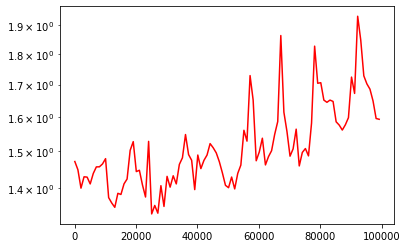

In [318]:
# the following funtion stress tests the above function
# and returns its growth w.r.t to input size
y=[]
x=[]
c=0
print(f'testing...')
for lim in range(pow(10,2), pow(10,5), 1000):
    c += 1
    
    y.append(test_fun(lim,lb,ub)) #records time retuned by test_fun
    x.append(lim)                 #records number of elements 
    
    #progress calculator
    temp = int((c*1000 / (pow(10,5) - pow(10,2)))*100)
    if temp % 10 == 0: #prints for 10% interval
        print(f'\t {temp}% done!')
        
#plotting params 
plt.yscale('log')
plt.xlabel('Number of items')
plt.ylabel('time consumed in Sec')
plt.plot(x,y,'r');
plt.show()

## Dequeue

In [325]:
# initialize using any iterable/collection object
dq = col.deque('abcde')
dq

deque(['a', 'b', 'c', 'd', 'e'])

In [326]:
# insert from either ends
dq.append('x')
print(dq)
dq.appendleft('y')
print(dq)

deque(['a', 'b', 'c', 'd', 'e', 'x'])
deque(['y', 'a', 'b', 'c', 'd', 'e', 'x'])


In [328]:
# remove from either ends
dq.pop()
print(dq)
dq.popleft()
print(dq)

deque(['y', 'a', 'b', 'c', 'd', 'e'])
deque(['a', 'b', 'c', 'd', 'e'])


In [329]:
# rotate
dq.rotate(3)
print(dq)
dq.rotate(-3)
print(dq)

deque(['c', 'd', 'e', 'a', 'b'])
deque(['a', 'b', 'c', 'd', 'e'])


# Advanced python class features
* create enumeration
* customised string and bytes representation of objects
* define computed and default attributes
* control how objects are logically compared to eachother 
* give objects numeric-like behaviour (add, sub etc.)

## Enumeration


In [331]:
from enum import Enum

class Test(Enum):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-331-604cf6c9c372>, line 4)